In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

#To show this as svg images
%config InlineBackend.figure_format = 'svg'

In [2]:
# define the model options and run

options = {
    'model': 'cfg/tiny-yolo-voc-6c.cfg',
    'load': 750,                             # 750 is the step number. Can be found in the ckpt folder
    'threshold': 0.05,                       # this number can be higher if the performance is better
    'gpu': 1.0                               # Dont use this if you have no gpu
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-6c.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 256)
 Init  |

# Object Detection from Image

In [3]:
# read the color image and covert to RGB

img = cv2.imread('images/img_2386.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)

img.shape

(504, 378, 3)

I have put the image below to see if it detecs accurately<br>
<img src="images/img_2386.jpg" alt="Smiley face" height="242" width="242"><br>
It detects ace.

In [4]:
# the label below is shown "ace"
result

[{'label': 'ace',
  'confidence': 0.5337237,
  'topleft': {'x': 115, 'y': 160},
  'bottomright': {'x': 252, 'y': 340}}]

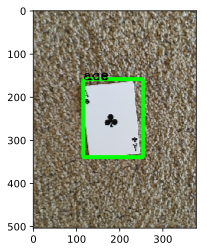

In [5]:
# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7) # draw a ractangle onto an image
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2) # add laebl name
plt.imshow(img)
plt.show()

Now I will show how to detect object from videos and using webcam

In [6]:
import numpy as np
import time

# Object Detection from Video

In [7]:
capture = cv2.VideoCapture('test2.mkv')
colors = [tuple(255 * np.random.rand(3)) for i in range(10)]

In [9]:
while (capture.isOpened()):
    stime = time.time()
    ret, frame = capture.read()# ret is a boolean. True when the video is playing.
    if ret:
        results = tfnet.return_predict(frame)
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            frame = cv2.rectangle(frame, tl, br, color, 7)
            frame = cv2.putText(frame, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
        cv2.imshow('frame', frame)
        print('FPS {:.1f}'.format(1 / (time.time() - stime)))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        capture.release()
        cv2.destroyAllWindows()
        break

FPS 0.6
FPS 2.8
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.8
FPS 3.7
FPS 3.7
FPS 3.4
FPS 3.8
FPS 3.7
FPS 3.8
FPS 3.7
FPS 3.8
FPS 3.7
FPS 2.9
FPS 3.8
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.6
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.8
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.8
FPS 3.7
FPS 3.7
FPS 3.7
FPS 3.0
FPS 3.6
FPS 3.8
FPS 3.8
FPS 3.4
FPS 3.8
FPS 3.8
FPS 3.8
FPS 3.8
FPS 3.7
FPS 3.8
FPS 3.8
FPS 3.7
FPS 3.8
FPS 3.8
FPS 3.8


It works fine for videos!

# Object Detection from Webcam

In [8]:
capture = cv2.VideoCapture(0)
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

while True:
    stime = time.time()
    ret, frame = capture.read()
    if ret:
        results = tfnet.return_predict(frame)
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            confidence = result['confidence']
            text = '{}: {:.0f}%'.format(label, confidence * 100)
            frame = cv2.rectangle(frame, tl, br, color, 5)
            frame = cv2.putText(
                frame, text, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
        cv2.imshow('frame', frame)
        print('FPS {:.1f}'.format(1 / (time.time() - stime)))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

FPS 1.3
FPS 11.2
FPS 12.1
FPS 12.2
FPS 12.7
FPS 12.5
FPS 12.7
FPS 12.9
FPS 12.5
FPS 12.7
FPS 12.8
FPS 12.3
FPS 12.7
FPS 12.5
FPS 12.9
FPS 13.0
FPS 12.7
FPS 12.9
FPS 13.2
FPS 12.5
FPS 12.2
FPS 12.7
FPS 12.7
FPS 12.7
FPS 12.7
FPS 12.5
FPS 12.9
FPS 12.4
FPS 12.7
FPS 12.4
FPS 12.4
FPS 12.4
FPS 12.7
FPS 12.9
FPS 12.9
FPS 12.8
FPS 12.5
FPS 12.7
FPS 12.3
FPS 12.9
FPS 12.7
FPS 12.7
FPS 12.9
FPS 12.4
FPS 12.7
FPS 12.2
FPS 13.0
FPS 12.9
FPS 12.1
FPS 12.9
FPS 12.5
FPS 12.4
FPS 13.0
FPS 12.7
FPS 12.4
FPS 12.9
FPS 12.4
FPS 12.8
FPS 13.0
FPS 12.4
FPS 12.9
FPS 12.9
FPS 13.0
FPS 12.9
FPS 12.9
FPS 12.9
FPS 12.9
FPS 12.7
FPS 12.9
FPS 13.0
FPS 12.5
FPS 13.2
FPS 12.9
FPS 12.7
FPS 13.0
FPS 12.5
FPS 13.0
FPS 12.9
FPS 12.5
FPS 13.0
FPS 12.7
FPS 12.5
FPS 13.2
FPS 12.5
FPS 13.0
FPS 13.0
FPS 12.9
FPS 12.9
FPS 13.0
FPS 12.7
FPS 13.0
FPS 13.2
FPS 12.9
FPS 13.2
FPS 13.0
FPS 12.7
FPS 13.0
FPS 13.0
FPS 12.9
FPS 13.0
FPS 12.7
FPS 12.7
FPS 13.0
FPS 12.9
FPS 12.9
FPS 12.7
FPS 12.9
FPS 13.0
FPS 12.9
FPS 12.9
FPS 13.0
FP

FPS 12.1
FPS 12.5
FPS 12.5
FPS 12.7
FPS 12.5
FPS 12.4
FPS 12.7
FPS 12.7
FPS 12.5
FPS 12.5
FPS 12.2
FPS 12.4
FPS 12.2
FPS 12.5
FPS 12.5
FPS 12.5
FPS 12.7
FPS 12.2
FPS 12.4
FPS 12.4
FPS 12.7
FPS 12.4
FPS 12.7
FPS 12.4
FPS 12.2
FPS 12.7
FPS 12.5
FPS 12.7
FPS 12.5
FPS 11.9
FPS 12.7
FPS 12.5
FPS 12.2
FPS 12.4
FPS 12.5
FPS 12.5
FPS 12.5
FPS 12.5
FPS 12.7
FPS 12.4
FPS 12.2
FPS 12.1
FPS 12.4
FPS 12.4
FPS 12.2
FPS 12.2
FPS 11.4
FPS 12.1
FPS 12.1
FPS 12.2
FPS 11.8
FPS 11.9
FPS 12.7
FPS 12.4
FPS 12.7
FPS 12.4
FPS 12.4
FPS 12.7
FPS 12.4
FPS 12.2
FPS 12.5
FPS 10.4
FPS 12.7
FPS 12.4
FPS 11.3
FPS 12.5
FPS 12.5
FPS 12.7
FPS 12.5
FPS 12.4
FPS 12.4
FPS 12.4
FPS 12.2
FPS 12.5
FPS 12.4
FPS 12.4
FPS 11.8
FPS 12.2
FPS 12.4
FPS 12.1
FPS 11.8
FPS 11.9
FPS 11.4
FPS 12.2
FPS 12.1
FPS 12.2
FPS 12.1
FPS 12.2
FPS 12.2
FPS 12.5
FPS 12.2
FPS 12.5
FPS 12.2
FPS 12.1
FPS 12.4
FPS 12.2
FPS 12.4
FPS 12.4
FPS 11.5
FPS 12.5
FPS 11.3
FPS 12.4
FPS 12.5
FPS 12.2
FPS 12.1
FPS 12.5
FPS 12.4
FPS 12.5
FPS 12.2
FPS 12.2
FPS 12.4
F

FPS 5.1
FPS 5.0
FPS 5.1
FPS 5.1
FPS 5.2
FPS 5.1
FPS 5.1
FPS 5.0
FPS 5.0
FPS 4.9
FPS 4.9
FPS 4.8
FPS 4.7
FPS 4.9
FPS 4.9
FPS 5.0
FPS 4.9
FPS 5.1
FPS 5.1
FPS 5.1
FPS 4.9
FPS 4.9
FPS 4.9
FPS 4.9
FPS 5.1
FPS 5.1
FPS 5.2
FPS 5.1
FPS 5.1
FPS 5.0
FPS 5.1
FPS 5.1
FPS 5.1
FPS 5.1
FPS 5.0
FPS 5.1
FPS 5.1
FPS 5.1
FPS 5.2
FPS 5.1
FPS 5.1
FPS 5.0
FPS 4.7
FPS 5.0
FPS 4.9
FPS 5.0
FPS 5.0
FPS 5.0
FPS 5.0
FPS 5.0
FPS 4.9
FPS 4.9
FPS 5.1
FPS 4.8
FPS 5.0
FPS 4.8
FPS 4.7
FPS 4.7
FPS 4.9
FPS 4.9
FPS 5.0
FPS 4.7
FPS 4.9
FPS 4.8
FPS 5.1
FPS 4.9
FPS 4.7
FPS 4.5
FPS 4.9
FPS 4.9
FPS 4.9
FPS 5.0
FPS 4.8
FPS 4.7
FPS 4.9
FPS 4.9
FPS 4.8
FPS 4.8
FPS 4.8
FPS 4.8
FPS 4.8
FPS 4.8
FPS 4.9
FPS 4.9
FPS 5.0
FPS 4.9
FPS 5.0
FPS 4.9
FPS 4.9
FPS 5.0
FPS 5.0
FPS 4.7
FPS 5.0
FPS 4.9
FPS 4.9
FPS 4.9
FPS 4.9
FPS 4.9
FPS 5.0
FPS 5.0
FPS 4.8
FPS 4.8
FPS 4.8
FPS 4.8
FPS 5.0
FPS 5.0
FPS 5.0
FPS 5.1
FPS 5.0
FPS 5.0
FPS 4.9
FPS 5.0
FPS 5.0
FPS 4.8
FPS 5.0
FPS 4.9
FPS 4.9
FPS 5.0
FPS 4.5
FPS 4.9
FPS 4.8
FPS 4.9
FPS 5.1
FPS 4.9
FPS 5.0
